In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
data = pd.read_csv('50_Startups.csv')

EDA and Visualizations

In [3]:
print(data.head())
print(data.info())
print(data.describe())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000

correlations

<ipython-input-4-6e229399d7b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


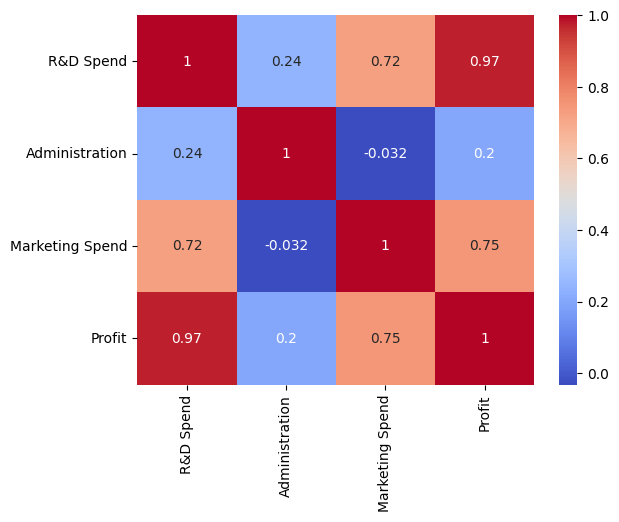

In [4]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Data Preprocessing and Transformations

In [5]:
data = pd.get_dummies(data, columns=['State'], drop_first=True)

In [6]:
X = data.drop('Profit', axis=1)
y = data['Profit']

Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Building and Diagnostics - Linear Regression, Lasso, Ridge

In [9]:
models = {'Linear Regression': LinearRegression(),
          'Lasso': Lasso(alpha=0.1),
          'Ridge': Ridge(alpha=0.1)}

In [10]:
r2_scores = {}


In [11]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

R-squared values for each model

In [12]:
for name, score in r2_scores.items():
    print(f'{name} R-squared: {score}')

Linear Regression R-squared: 0.8987266414319838
Lasso R-squared: 0.8987289581629458
Ridge R-squared: 0.898537985100537


Model Diagnostics - Residual Analysis, Cook's distance, leverage

In [13]:
final_model = Ridge(alpha=0.1)  # Example: using Ridge as the final model
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)

Residual Analysis

In [14]:
residuals = y_test - y_pred_final

In [23]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

In [16]:
influence = model.get_influence()

In [24]:
residuals = influence.resid

Cook's Distance

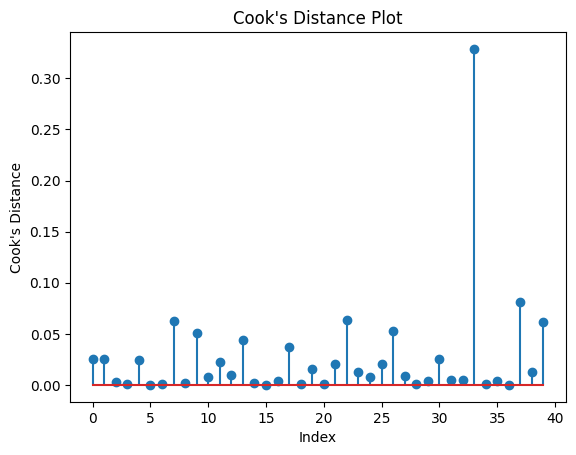

In [18]:
cook_distance = influence.cooks_distance[0]
plt.stem(np.arange(len(cook_distance)), cook_distance)
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

In [20]:
leverage = influence.hat_matrix_diag

<Axes: >

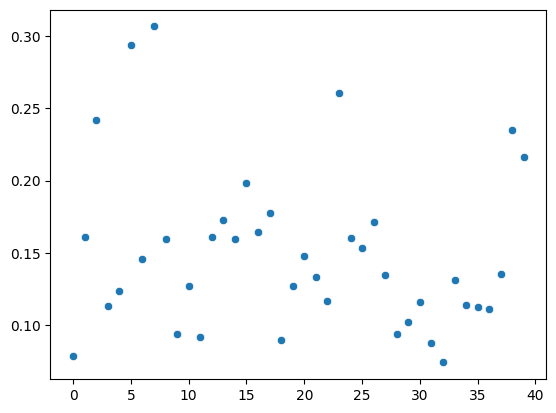

In [29]:
sns.scatterplot(leverage)

leverage

<Axes: >

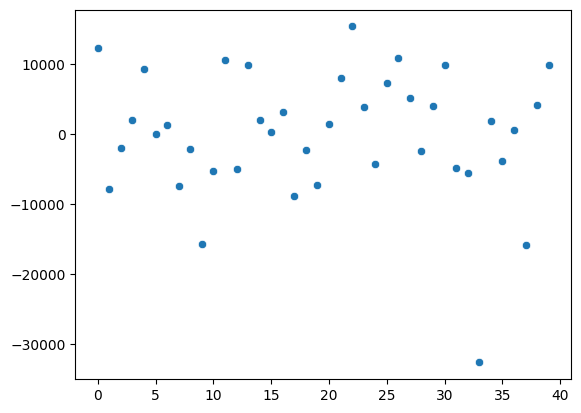

In [30]:
sns.scatterplot(residuals)

residual analysis

In [32]:
final_model = Ridge(alpha=0.1)  # Using Ridge as the final model (you can adjust alpha)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
final_r2 = r2_score(y_test, y_pred_final)
print(f'Final Model R-squared: {final_r2}')

Final Model R-squared: 0.898537985100537
